# Лабораторная работа 7. 
# Классификация методом k ближайших соседей и наивным байесовским классификатором

В данной работе вы 
1. на примере классического датасета "Ирисы Фишера" 
- научитесь проводить классификациию методами kNN и NaiveBayes, используя средства библиотеки `scikit-learn`
- изучите способы оценки качества моделей для случая многоклассовой классификации
2. познакомитесь с платформой Kaggle, и для датасета с этой платформы решите задачу классификации двумя изученными методами, сравните качество полученных моделей.


## Классификация ирисов Фишера

#### Импорт библиотек и загрузка данных

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection
from sklearn.naive_bayes import GaussianNB # Гауссовский нивный классификатор
from sklearn.neighbors import KNeighborsClassifier # Классификатор k ближайших соседей
#plt.style.use('seaborn-darkgrid')
#plt.rc('figure', figsize=(16,10))
#plt.rc('lines', markersize=4)

In [2]:
iris_loaded = datasets.load_iris() # загрузка встроенного в библиотеку sklearn.datasets набора данных с ирисами
iris=pd.DataFrame(iris_loaded.data, columns=iris_loaded.feature_names)
iris['target']=iris_loaded.target_names[iris_loaded.target]
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Кодирование категориальных данных, разбиение данных на тренировочную и тестовую выборки

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
coder=LabelEncoder() # В данной задаче воспользуемся только кодированием LabelEncoder

In [4]:
iris_train, iris_test=model_selection.train_test_split(iris, test_size=0.3) 
X_train, y_train = iris_train.drop(['target'], axis=1), iris_train.target # отделяем столбец с откликом из тренировочной и тестовой выборок
X_test, y_test = iris_test.drop(['target'], axis=1), iris_test.target

y_train=coder.fit_transform(y_train) # обучаем кодер LabelEncoder на y_train (fit) и сразу же применяем его к y_train (transform)
y_test=coder.transform(y_test) # применяем обученный кодер к тестовой выборке

#### Обучение классификатора kNN c параметрами по умолчанию на тренировочной выборке

In [5]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


#### Оценка качества на тестовой выборке
В нашей задаче три класса, поэтому вычислять метрики качества как в задаче бинарной классификации не получится. По ссылке
[Метрики для многоклассовой классификации](https://ml-handbook.ru/chapters/model_evaluation/intro#%D0%BC%D0%BD%D0%BE%D0%B3%D0%BE%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%BE%D0%B2%D0%B0%D1%8F-%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F) изучите способы вычисления метрик для случая более 2 классов.

Технически мы будем пользоваться теми же средствами пакета `sklearn.metrics`, что и для бинарного случая, но дополнительно указывать способ усреднения метрик (микро- или макроусреднение) (аргумент функций метрик `average`)

In [6]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [7]:
print("precision=", precision_score(knn.predict(X_test),y_test, average='macro'))
print("recall=", recall_score(knn.predict(X_test),y_test,average='macro'))
print("accuracy=", accuracy_score(knn.predict(X_test),y_test))

precision= 1.0
recall= 1.0
accuracy= 1.0


Вывод на экран матрицы неточностей

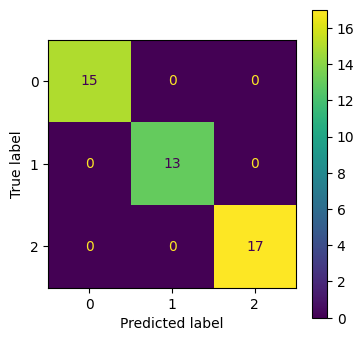

In [8]:
cm=confusion_matrix(knn.predict(X_test), y_test)
fig=plt.figure(figsize = (4, 4))
ax = fig.add_subplot(111)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
# display_labels=coder.inverse_transform(knn.classes_))# раскомментируйте строку, если хотите, чтоьы вместо меток классов отображались названия
 display_labels=knn.classes_)# закомментируйте строку, если хотите, чтоьы вместо меток классов отображались названия
disp.plot(ax=ax)
ax.grid(False)

#### Прогнозирование c помощью kNN на новых данных 

In [9]:
# Какой сорт будет у ириса с чашелистником размера 5 x 3.2 и лепестками размера 4.2 x 2
X_pred = [5, 3.2, 4.2, 2]
result = knn.predict([X_pred, ]) 

result_name=coder.inverse_transform(result) # от числовой метки класса переходим назад к названиям с помошью метода кодера inverse_transform
result_name

c:\Users\dpomi\source\repos\data_science\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['versicolor'], dtype=object)

#### Обучение классификатора GaussianNaiveBayes c параметрами по умолчанию на тренировочной выборке

In [10]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


#### Оценка качества на тестовой выборке

In [11]:
print("precision=", precision_score(gnb.predict(X_test),y_test, average='macro'))
print("recall=", recall_score(gnb.predict(X_test),y_test,average='macro'))
print("accuracy=", accuracy_score(gnb.predict(X_test),y_test))

precision= 1.0
recall= 1.0
accuracy= 1.0


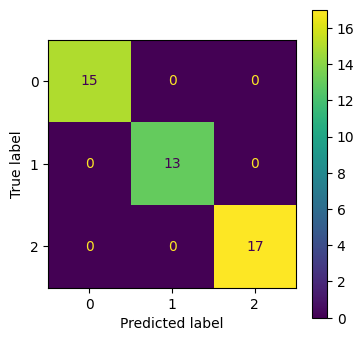

In [12]:
cm=confusion_matrix(gnb.predict(X_test), y_test)
fig=plt.figure(figsize = (4, 4))
ax = fig.add_subplot(111)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
# display_labels=coder.inverse_transform(knn.classes_))# раскомментируйте строку, если хотите, чтоьы вместо меток классов отображались названия
 display_labels=knn.classes_)# закомментируйте строку, если хотите, чтоьы вместо меток классов отображались названия
disp.plot(ax=ax)
ax.grid(False)

#### Прогнозирование c помощью GaussianNaiveBayes на новых данных 

In [13]:
# Какой сорт будет у ириса с чашелистником размера 5 x 3.2 и лепестками размера 4.2 x 2

result = gnb.predict([X_pred, ])

result_name=coder.inverse_transform(result)
result_name

c:\Users\dpomi\source\repos\data_science\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['virginica'], dtype=object)

📌📌📌 **Задание для вариантов 1-3**

1.Загрузите датасеты, изучите информацию про них на платформе Kaggle:
- **Вариант 1** [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
- **Вариант 2** [Fraud Detection](https://www.kaggle.com/datasets/whenamancodes/fraud-detection)
- **Вариант 3** [Blood Transfusion Dataset](https://www.kaggle.com/datasets/whenamancodes/blood-transfusion-dataset)

2. Подготовьте данные для анализа удалите строки с пропусками данных, лишние столбцы, не несущие полезной информации для прогнозирования (если будут), при необходимости примените кодирование LabelEncoding для отклика

3. Обучите и оцените качество для моделей kNN  и GaussianNaiveBayes c параметрами по умолчанию.

4. Попробуйте улучшить качество прогноза для kNN, выбрав другое количество ближайших соседей (не 5, как по умолчанию)

5. Какая из обученных вами моделей обладаем наилучшим качеством прогноза?

In [14]:
# Ваш код

📌📌📌 **Задание для варианта 4**

1.Загрузите датасет [Airline Passenger Satisfaction](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction), изучите информацию про него на платформе Kaggle:

2. Подготовьте данные для анализа удалите строки с пропусками данных, лишние столбцы, не несущие полезной информации для прогнозирования (если будут),  при необходимости примените кодирование LabelEncoding для отклика

3. Обучите модели kNN  и GaussianNaiveBayes c параметрами по умолчанию ТОЛЬКО НА ЧИСЛОВЫХ ПРЕДИКТОРАХ, оцените качество моделей на тестовой выборке (обратите внимание, она у вас задана в отдельном файле)

3. Обучите модели kNN  и GaussianNaiveBayes c параметрами по умолчанию НА ВСЕХ ПРЕДИКТОРАХ, применив в категориальным переменным кодирование OneHotEncoding. Улучшилось ли качество?

4. Попробуйте еще улучшить качество прогноза для kNN, выбрав другое количество ближайших соседей (не 5, как по умолчанию)

5. Какая из обученных вами моделей обладаем наилучшим качеством прогноза?

In [3]:
# Ваш код
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df = pd.read_csv('Airline Passenger Satisfaction.csv')
#columns: ,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
#Подготовьте данные для анализа удалите строки с пропусками данных, лишние столбцы, не несущие полезной информации для прогнозирования (если будут),  при необходимости примените кодирование LabelEncoding для отклика
df = df.dropna()
df = df.drop(columns=['id', 'Unnamed: 0'])
from sklearn.preprocessing import LabelEncoder
coder = LabelEncoder()
df['satisfaction'] = coder.fit_transform(df['satisfaction'])


kNN Model:
precision= 0.675002576788291
recall= 0.6796477770108577
accuracy= 0.6835736354273945
Gaussian Naive Bayes Model:
precision= 0.7894584127843056
recall= 0.7861606738009344
accuracy= 0.7874613800205973


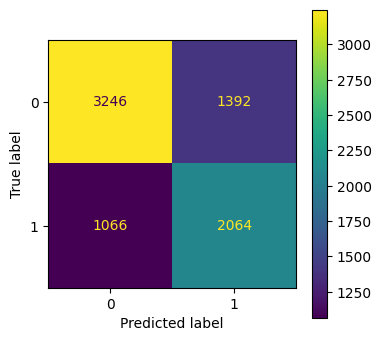

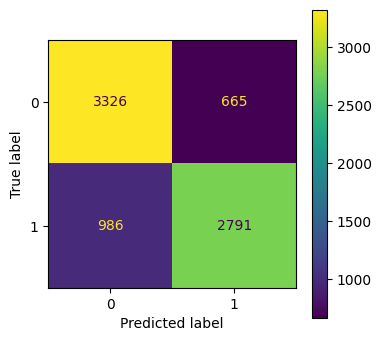

In [8]:
#Обучите модели kNN  и GaussianNaiveBayes c параметрами по умолчанию ТОЛЬКО НА ЧИСЛОВЫХ ПРЕДИКТОРАХ, оцените качество моделей на тестовой выборке (обратите внимание, она у вас задана в отдельном файле)
X = df.select_dtypes(include=[np.number]).drop(columns=['satisfaction'])
y = df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("kNN Model:")
print("precision=", precision_score(knn.predict(X_test),y_test, average='macro'))
print("recall=", recall_score(knn.predict(X_test),y_test,average='macro'))
print("accuracy=", accuracy_score(knn.predict(X_test),y_test))
cm=confusion_matrix(knn.predict(X_test), y_test)
fig=plt.figure(figsize = (4, 4))
ax = fig.add_subplot(111)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
 display_labels=knn.classes_)
disp.plot(ax=ax)
ax.grid(False)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Gaussian Naive Bayes Model:")
print("precision=", precision_score(gnb.predict(X_test),y_test, average='macro'))
print("recall=", recall_score(gnb.predict(X_test),y_test,average='macro'))
print("accuracy=", accuracy_score(gnb.predict(X_test),y_test))
cm=confusion_matrix(gnb.predict(X_test), y_test)
fig=plt.figure(figsize = (4, 4))
ax = fig.add_subplot(111)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
    display_labels=gnb.classes_)
disp.plot(ax=ax)
ax.grid(False)

kNN Model:
precision= 0.6790226349378136
recall= 0.6829626819343825
accuracy= 0.6869207003089598
Gaussian Naive Bayes Model:
precision= 0.8393426183604755
recall= 0.8406436329314029
accuracy= 0.842173017507724


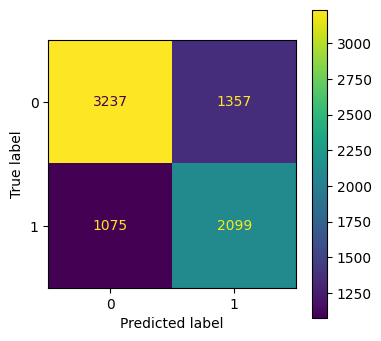

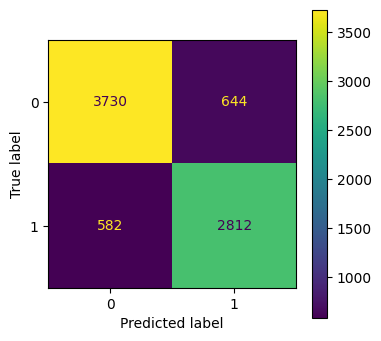

In [14]:
#Обучите модели kNN  и GaussianNaiveBayes c параметрами по умолчанию НА ВСЕХ ПРЕДИКТОРАХ, применив в категориальным переменным кодирование OneHotEncoding. Улучшилось ли качество?
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=[np.number]).drop(columns=['satisfaction']).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])
X_processed = preprocessor.fit_transform(df.drop(columns=['satisfaction']))
y = df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("kNN Model:")
print("precision=", precision_score(knn.predict(X_test),y_test, average='macro'))
print("recall=", recall_score(knn.predict(X_test),y_test,average='macro'))
print("accuracy=", accuracy_score(knn.predict(X_test),y_test))
cm=confusion_matrix(knn.predict(X_test), y_test)
fig=plt.figure(figsize = (4, 4))
ax = fig.add_subplot(111)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
 display_labels=knn.classes_)
disp.plot(ax=ax)
ax.grid(False)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Gaussian Naive Bayes Model:")
print("precision=", precision_score(gnb.predict(X_test),y_test, average='macro'))
print("recall=", recall_score(gnb.predict(X_test),y_test,average='macro'))
print("accuracy=", accuracy_score(gnb.predict(X_test),y_test))
cm=confusion_matrix(gnb.predict(X_test), y_test)
fig=plt.figure(figsize = (4, 4))
ax = fig.add_subplot(111)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
    display_labels=gnb.classes_)
disp.plot(ax=ax)
ax.grid(False)

kNN Model:
precision= 0.6790226349378136
recall= 0.6829626819343825
accuracy= 0.6869207003089598


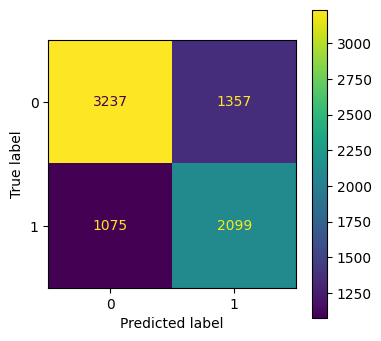

In [13]:
#Попробуйте еще улучшить качество прогноза для kNN, выбрав другое количество ближайших соседей (не 5, как по умолчанию)
knn = KNeighborsClassifier(n_neighbors=5)  # Изменено количество соседей на 10
knn.fit(X_train, y_train)
print("kNN Model:")
print("precision=", precision_score(knn.predict(X_test),y_test, average='macro'))
print("recall=", recall_score(knn.predict(X_test),y_test,average='macro'))
print("accuracy=", accuracy_score(knn.predict(X_test),y_test))
cm=confusion_matrix(knn.predict(X_test), y_test)
fig=plt.figure(figsize = (4, 4))
ax = fig.add_subplot(111)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
 display_labels=knn.classes_)
disp.plot(ax=ax)
ax.grid(False)